# Verify edit distance

In [2]:
import editdistance

In [3]:
mutated = open("sequences/sequence_with_18_mutations.fasta","r").readlines()[1:]
mutated = "".join(mutated)
#print(mutated)
original = open("sequences/sequence_with_21_mutations.fasta","r").readlines()[1:]
original = "".join(original)

In [4]:
print(editdistance.eval(mutated, original))

39


# Analyse results of experiment

In [5]:
from utils import getListOfFiles
import os

all_files = getListOfFiles(os.curdir)
res_path = "kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv"
res_files = list(filter(lambda p: res_path in p, all_files))
print(res_files)

['./18_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './15_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './12_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './27_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './6_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './21_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './3_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './24_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './30_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv', './9_mutations/kallisto/benchmarks/SARS-CoV-2-NC_045513_ab50/predictions_m1.0.tsv']


In [6]:
import pandas as pd
res_dict = {3:(0,0), 6:(0,0), 9:(0,0), 
    12:(0,0), 15 :(0,0), 18:(0,0), 21:(0,0), 
    24:(0,0), 27:(0,0), 30:(0,0)}

for res_file  in res_files:
    #get the number of mutations
    nm = res_file[2]
    if res_file[3] != "_":
        nm+= res_file[3]
    nm = int(nm)
    
    # read tsv
    tsv_file = open(res_file).readlines()[2:]
    
    #String at location 1 corresponds to SARS-CoV-2-0m and the true value at the second position of the resulting list
    #estimated value
    m0_ev = float(tsv_file[1].split("\t")[2])
    #true value
    tv = 50
    difference = round(abs(m0_ev-tv), 3)
    relative_error_0 = round(difference/tv, 3)
    #calculate relative prediction error for m0
    #print(relative_error_0)

    # find the other relevant sequence in the list from indices 2 - 11 and calculate relative prediction error
    for i in range (2, 11):
        if tsv_file[i].split("\t")[0].split("-")[3] == str(nm)+"m":
            mn_ev = float(tsv_file[i].split("\t")[2])
            difference = round(abs(mn_ev-tv), 3)
            relative_error_nm = round(difference/tv, 3)
            #print(relative_error_nm)
    
    res_dict[nm] = (relative_error_0, relative_error_nm)

print(res_dict)


    


        

{3: (0.005, 0.0), 6: (0.004, 0.0), 9: (0.004, 0.001), 12: (0.003, 0.002), 15: (0.004, 0.001), 18: (0.013, 0.008), 21: (0.002, 0.0), 24: (0.002, 0.0), 27: (0.005, 0.001), 30: (0.003, 0.0)}


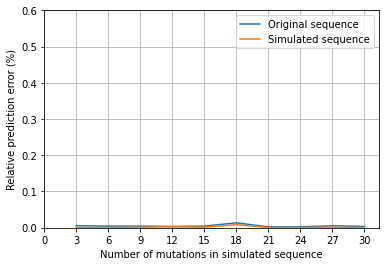

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
xs = []
line_1 = []
line_2 = []
for entry in res_dict.items():
    xs.append(entry[0])
    line_1.append(entry[1][0])
    line_2.append(entry[1][1])

plt=reload(plt)
plt.plot(xs, line_1, label="Original sequence")
plt.plot(xs, line_2, label="Simulated sequence")
plt.ylim(top= 0.6)
plt.legend()
plt.grid()
plt.xticks(np.arange(0,33,3))
plt.xlabel('Number of mutations in simulated sequence')
plt.ylabel('Relative prediction error (%)')
plt.savefig("results/results_fixed_title.pdf")
plt.show()